In [18]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

In [19]:
!pip3 freeze

absl-py==0.11.0
argon2-cffi==20.1.0
astunparse==1.6.3
async-generator==1.10
attrs==20.3.0
backcall==0.2.0
bleach==3.2.1
cachetools==4.1.1
certifi==2020.11.8
cffi==1.14.4
chardet==3.0.4
colorama==0.4.4
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
entrypoints==0.3
gast==0.3.3
google-auth==1.23.0
google-auth-oauthlib==0.4.2
google-pasta==0.2.0
grpcio==1.33.2
h5py==2.10.0
idna==2.10
ipykernel==5.3.4
ipython==7.19.0
ipython-genutils==0.2.0
jedi==0.17.2
Jinja2==2.11.2
json5==0.9.5
jsonschema==3.2.0
jupyter-client==6.1.7
jupyter-core==4.7.0
jupyterlab==2.2.9
jupyterlab-pygments==0.1.2
jupyterlab-server==1.2.0
Keras-Preprocessing==1.1.2
kiwisolver==1.3.1
Markdown==3.3.3
MarkupSafe==1.1.1
matplotlib==3.3.3
mistune==0.8.4
nbclient==0.5.1
nbconvert==6.0.7
nbformat==5.0.8
nest-asyncio==1.4.3
notebook==6.1.5
numpy==1.18.5
oauthlib==3.1.0
opt-einsum==3.3.0
packaging==20.4
pandas==1.1.4
pandocfilters==1.4.3
parso==0.7.1
pickleshare==0.7.5
Pillow==8.0.1
prometheus-client==0.9.0
prompt-toolkit==3.

In [20]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

In [23]:
# Import the Universal Sentence Encoder's TF Hub module
embed = hub.load(module_url)

In [27]:
# Compute a representation for each message, showing various lengths supported.
word = "Elephant"
sentence = "I am a sentence for which I would like to get its embedding."
paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "There is no hard limit on how long the paragraph is. Roughly, the longer "
    "the more 'diluted' the embedding will be.")
message = [word, sentence, paragraph]
message_embeddings = embed(message)

for i, message_embeddings in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(message[i]))
    print("Embedding size: {}".format(len(message_embeddings)))
    message_embeddings_snippet = ", ".join(
        (str(x) for x in message_embeddings[:3]))
    print("Embedding: [{}, ...]\n".format(message_embeddings_snippet))

Message: Elephant
Embedding size: 512
Embedding: [0.008344482630491257, 0.00048085578600876033, 0.06595247238874435, ...]

Message: I am a sentence for which I would like to get its embedding.
Embedding size: 512
Embedding: [0.05080859735608101, -0.016524294391274452, 0.01573782041668892, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. There is no hard limit on how long the paragraph is. Roughly, the longer the more 'diluted' the embedding will be.
Embedding size: 512
Embedding: [-0.028332680463790894, -0.05586216226220131, -0.01294142659753561, ...]



In [39]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")


def run_and_plot(messages_, encoding_tensor):
  plot_similarity(messages_, encoding_tensor, 90)

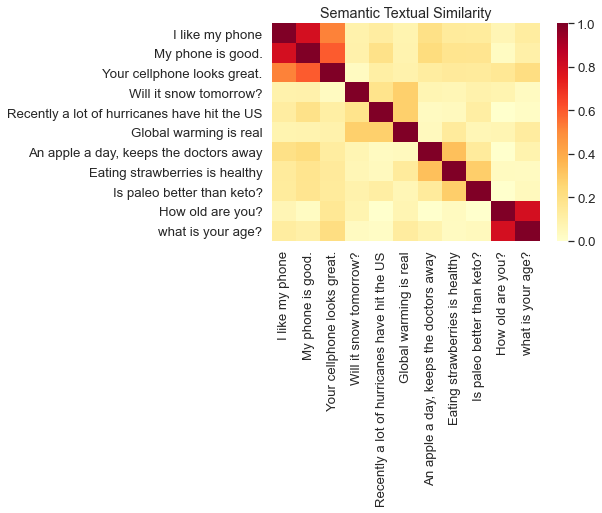

In [41]:
messages = [
    # Smartphones
    "I like my phone",
    "My phone is good.",
    "Your cellphone looks great.",

    # Weather
    "Will it snow tomorrow?",
    "Recently a lot of hurricanes have hit the US",
    "Global warming is real",

    # Food and health
    "An apple a day, keeps the doctors away",
    "Eating strawberries is healthy",
    "Is paleo better than keto?",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

similarity_message_encodings = embed(messages)
run_and_plot(messages, similarity_message_encodings)

In [44]:
embeddings1 = embed(["The quick brown fox jumps over the lazy dog."])
embeddings2 = embed(["The quick brown fox jumps over the lazy dog."])
corr = np.inner(embeddings1, embeddings2)

print(corr)

[[1.]]
